You are given a CSV file containing **loan data**. This is open-source data. Using this data you have to **produce an ML model for prediction analysis**.


Here are the things that you need to do:

1. Make a Jupyter Notebook file and do exploratory analysis with the given data
2. Plot the graph and find out the correlation between the data
3. Analyze the data and state a few facts about the data
4. Use different ML algorithms to build models and find out their training loss
5. Host the code on GitHub
6. Build a simple Front-End solution where someone can upload data to get predictions and host it on GitHub or Heroku


You have to submit your **GitHub and/or Heroku** link through an email to **digital@bizdatainsights.com**


______________________________________________________________________________________________________________________________

**Workflow:** 

- Import required libraries
- Exploratory Data Analysis(EDA)
- Feature Scaling
- Feature Engineering
- Model creation and Evaluation

## Importing Necessary Libraries

In [1]:
import numpy as np     
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
import missingno as msno
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load the data

In [2]:
df = pd.read_csv(r'Demo_Data_Loan.csv') 
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,0
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,0
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,0
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,0


**Column data details:**

- 'Loan_ID': refers to the ID of the loan takers
- 'Gender': Sex Identifier___ Male/ Female
- 'Married': Marital status__ yes/no
- 'Dependents': Number of Dependants___ 0, 1, 2, 3+
- 'Education': Education Level___ Graduated / Non graduated
- 'Self_Employed': If self employed or not___ yes/no
- 'ApplicantIncome': Loan applicants' income amounts
- 'Co-applicantIncome': co-applicants income amount
- 'LoanAmount': Amount of loans
- 'Loan_Amount_Term': A loan term is the length of time it will take for a loan to be completely paid off when the borrower is    making regular payments 
- 'Credit_History': credit history is a record of a borrower's responsible repayment of debts
- 'Property_Area': Urban, Rural, Semiurban___The people belong from different areas
- 'Loan Approved' : If loans approved or not ___ 0/1

In [3]:
df.shape

(367, 13)

## Exploratory Data Analysis(EDA)

- Before building any Machine Learning model, it is important to perform some Data Analysis to get general idea. EDA is the process to examine and understand the data and extracting data insights as well as main characteristics. To understand the problem statement and various relationship between the data features EDA is very essential. 

- EDA is generally classified into two methods: **Graphical analysis** & **Non-graphical analysis**.

**Steps of EDA**

- Understand the data : Basic Exploration and Data cleaning 
- Univariate Analysis
- Bivariate Analysis
- Missing values treatment
- Encoding Categorical variables 
- Normalizing and Scaling
- Outlier checking and treatment
- Variable Transformation and creation

### **i. Understand the Data : Basic Exploration and Data cleaning**:  
- To solve any problem it is necessary to understand the data. The most important task is to determine the Dependent/Predicted Variables(target/label) and Independent/Predictor Variables. 

In [4]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan Approved']

In [5]:
## Data types of each columns

df.dtypes 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan Approved          int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan Approved      367 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 37.4+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved
count,367.000000,367.000000,362.000000,361.000000,338.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444,0.070845
std,4910.685399,2334.232099,61.366652,65.156643,0.380150,0.256915
min,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000,0.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000,0.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000,1.000000


<AxesSubplot:>

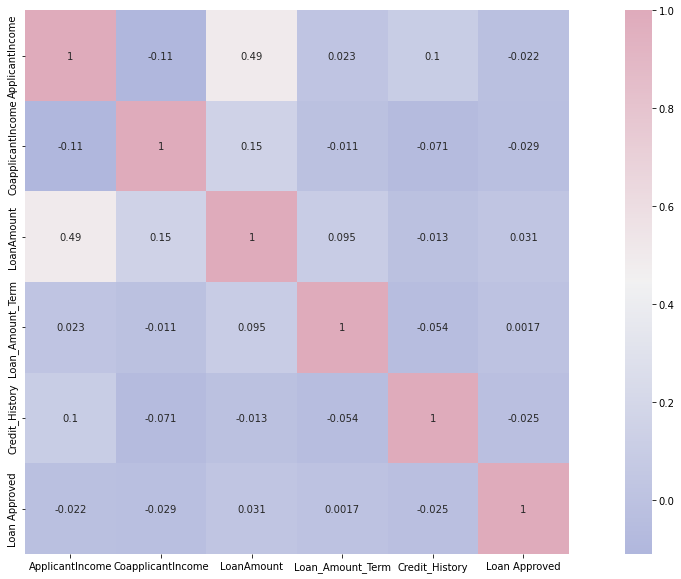

In [8]:
corrmat = df.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(20,10))
sns.heatmap(corrmat,cmap= cmap, annot=True, square=True)

## Basic Data Visualization

In [9]:
applicantType1 = df.groupby(["Gender"], as_index=False)["Loan Approved"].count()
applicantType1

,Gender,Loan Approved
0,Female,70
1,Male,286


- There are two types of applicants in terms of gender in the dataset, Male & Female. Among them Male Applicants are the highest loan takers than the female applicants.

In [10]:
applicantType2 = df.groupby(["Married"], as_index=False)["Loan Approved"].count()
applicantType2

,Married,Loan Approved
0,No,134
1,Yes,233


- There are two types of applicants in terms of marital status in the dataset, Married & Unmarried. Among them Married Applicants are the highest loan takers than the Unmarried applicants.

In [11]:
LoanAmount = df.groupby(["Credit_History"], as_index=False)["Loan Approved"].count()
LoanAmount

,Credit_History,Loan Approved
0,0.0,59
1,1.0,279


- Lone approval status depending on Credit_history

### ii. Univariate Analysis : now, graphing the raw data to see the normal distribution of the columns. 
- Using Histogram to show up if the data is normally distributed or not. 

<AxesSubplot:>

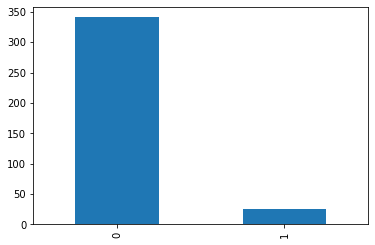

In [12]:
# data of Loan Approval


df['Loan Approved'].value_counts().plot.bar()

In [13]:
df['Loan Approved'].value_counts()

0    341
1     26
Name: Loan Approved, dtype: int64

- Among the 367 applicants, 26 applicants got approval for Loans

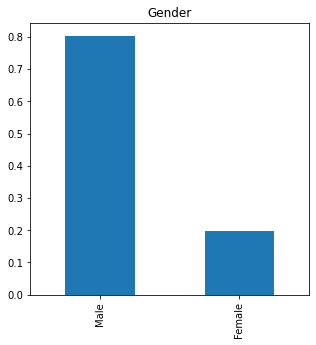

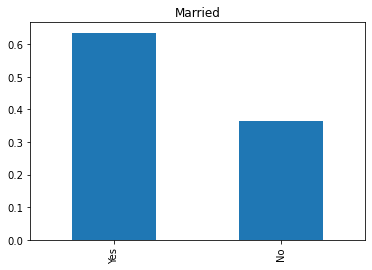

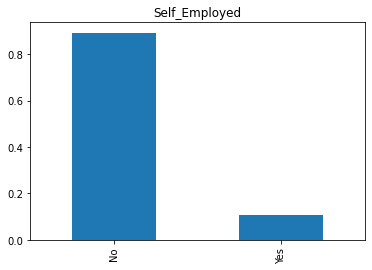

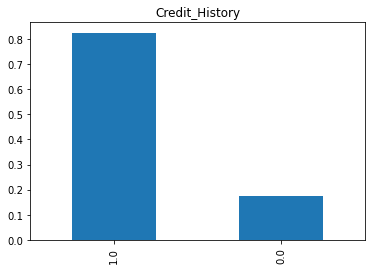

In [14]:
## ALL Categorical Independent Variables
## the data distribution

df['Gender'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Gender')
plt.show()
df['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

- 80% of applicants are male.
- 65% of the applicants are married.
- 15% of applicants are self-employed.
- 85% of applicants have repaid their debts.

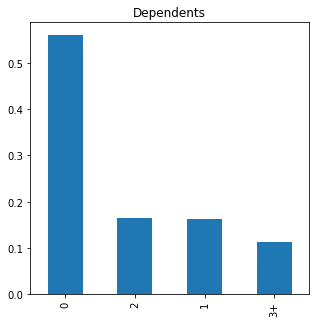

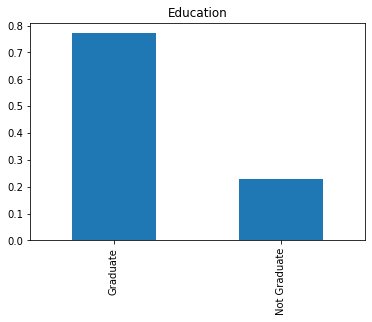

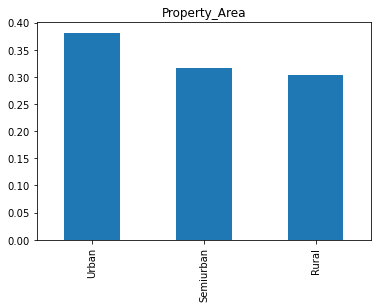

In [15]:
### Visualization on Ordinal Independent Variables


df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Dependents')
plt.show()
df['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
df['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

- Mostly don't have any dependents.
- Around 80% of the applicants are Graduate.
- Most are urban applicants.

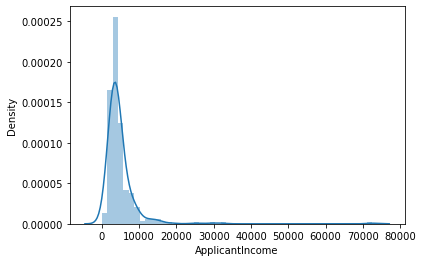

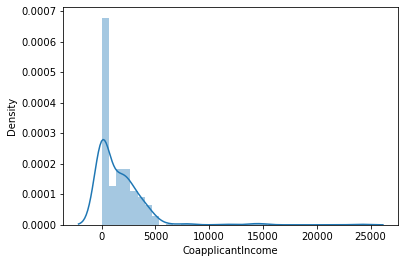

In [16]:
### Visualization on Numerical Independent Variables


sns.distplot(df['ApplicantIncome'])
plt.show()
sns.distplot(df['CoapplicantIncome'])
plt.show()


- For the applicantincome and the co-applicants income, the data distribution is not normal, that is left-skewed.

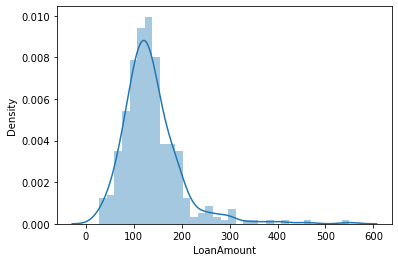

In [17]:
sns.distplot(df['LoanAmount'])
plt.show()

#### Boxplot : to show the Outliers in the data 

- The boxplot confirms the presence of outliers/extreme values in the dataset

<AxesSubplot:xlabel='ApplicantIncome'>

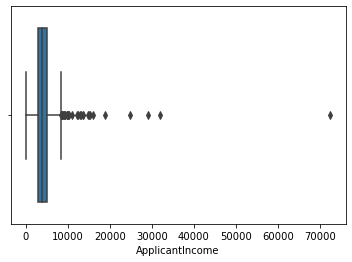

In [18]:
## Check the Outliers of the Numerical Data


a1 = sns.boxplot(x=df['ApplicantIncome']) 
a1

<AxesSubplot:xlabel='CoapplicantIncome'>

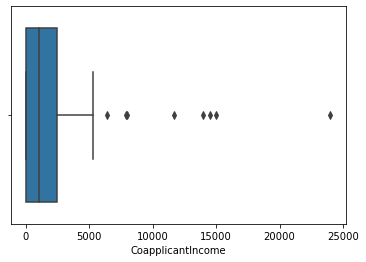

In [19]:
a2 = sns.boxplot(x=df['CoapplicantIncome']) 
a2

<AxesSubplot:xlabel='LoanAmount'>

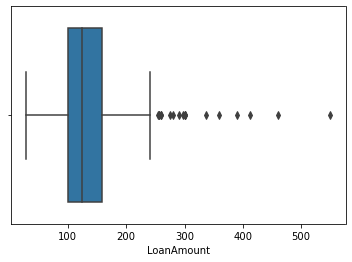

In [20]:
a3 = sns.boxplot(x=df['LoanAmount']) 
a3

- No outliers found in the numerical features

### iii.  Bivariate Analysis 
- now we will look on each variables with respect to target variable.


##### Gender VS Loan Approved 

Text(0.5, 1.0, 'Number of approved loans vs Gender')

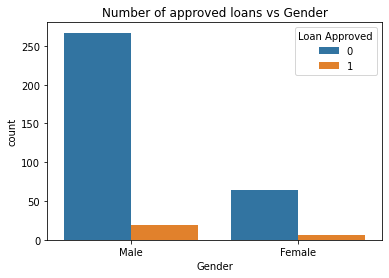

In [21]:
sns.countplot(df["Gender"], hue = df["Loan Approved"])
plt.title('Number of approved loans vs Gender')

**Married  VS  Loan Approved**

Text(0.5, 1.0, 'Number of Loan Approved vs Married')

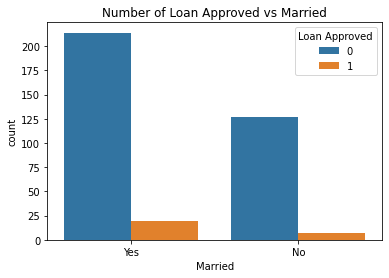

In [22]:
sns.countplot(df["Married"], hue = df["Loan Approved"])
plt.title('Number of Loan Approved vs Married')

#### Dependants VS Loan Approved

Text(0.5, 1.0, 'Having depepdents vs Loan Approval')

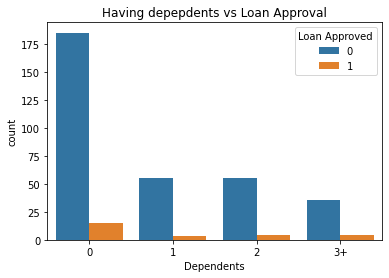

In [23]:
sns.countplot(df["Dependents"], hue = df["Loan Approved"])
plt.title('Having depepdents vs Loan Approval')

**Educational status vs Loan Approval**

Text(0.5, 1.0, ' Educational status vs Loan Approval')

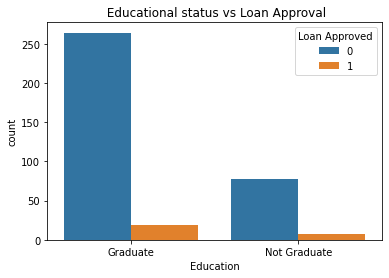

In [24]:
sns.countplot(df["Education"], hue = df["Loan Approved"])
plt.title(' Educational status vs Loan Approval')

**Self_Employed vs Loan Approval**

Text(0.5, 1.0, 'Self_Employed vs Loan Approval')

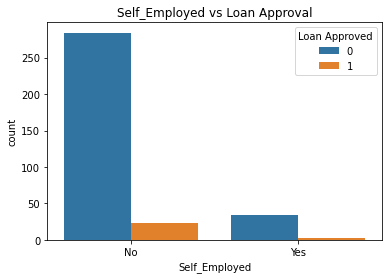

In [25]:
sns.countplot(df["Self_Employed"], hue = df["Loan Approved"])
plt.title('Self_Employed vs Loan Approval')

**Loan_Amount_Term vs Loan Approved**

Text(0.5, 1.0, 'Loan_Amount_Term vs Loan Approved')

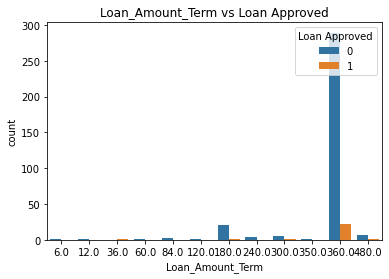

In [26]:
sns.countplot(df["Loan_Amount_Term"], hue = df["Loan Approved"])
plt.title('Loan_Amount_Term vs Loan Approved')

**Credit_History vs Loan Approved**

Text(0.5, 1.0, 'Credit_History vs Loan Approved')

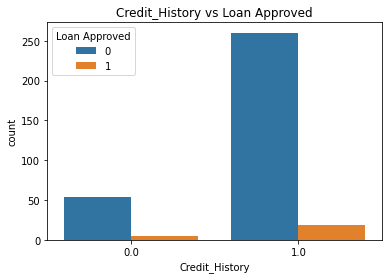

In [27]:
sns.countplot(df["Credit_History"], hue = df["Loan Approved"])
plt.title('Credit_History vs Loan Approved')

**Property_Area vs Loan Approved**

Text(0.5, 1.0, 'Property_Area vs Loan Approved')

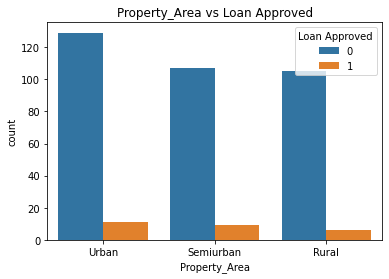

In [28]:
sns.countplot(df["Property_Area"], hue = df["Loan Approved"])
plt.title('Property_Area vs Loan Approved')

**Numerical Independent Variables -- Applicant Income, Coapplicants Income vs Target Variable**

<AxesSubplot:xlabel='Loan Approved'>

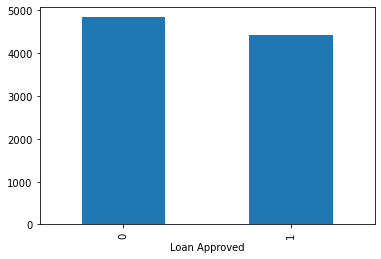

In [29]:
df.groupby('Loan Approved')['ApplicantIncome'].mean().plot.bar()

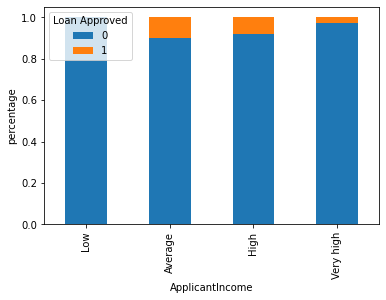

In [30]:
Income1=[0,2000,3000,4000,5000]
group=['Low','Average','High', 'Very high']
df['Income']=pd.cut(df['ApplicantIncome'],Income1,labels=group)
Income=pd.crosstab(df['Income'],df['Loan Approved'])
Income.div(Income.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('percentage')

- Applicant income does not affect the chances of loan approval here.  There can be hypothesis that is the high income of  applicants can create the possibility higher for the loan approval, but that is not true here. 

<AxesSubplot:xlabel='Loan Approved'>

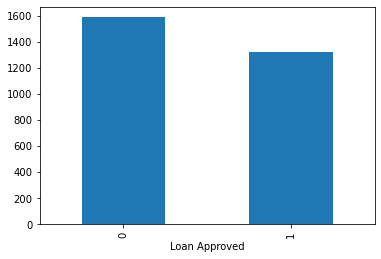

In [31]:
df.groupby('Loan Approved')['CoapplicantIncome'].mean().plot.bar()

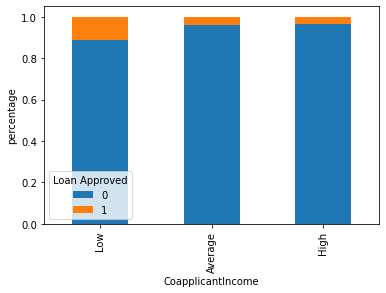

In [32]:
Income2=[0,600,1200,1600]
group=['Low','Average','High']
df['Income']=pd.cut(df['CoapplicantIncome'],Income2,labels=group)
Income=pd.crosstab(df['Income'],df['Loan Approved'])
Income.div(Income.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('percentage')

- this shows that when co-applicants income is less, the higher the chances of loan approval. But this is not right, we need to combine the both variables and count the total amount.  

### Data Preprocessing

#### Checking missing values in the dataframe

In [33]:
df.isna().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             5
Loan_Amount_Term       6
Credit_History        29
Property_Area          0
Loan Approved          0
Income               305
dtype: int64

<AxesSubplot:>

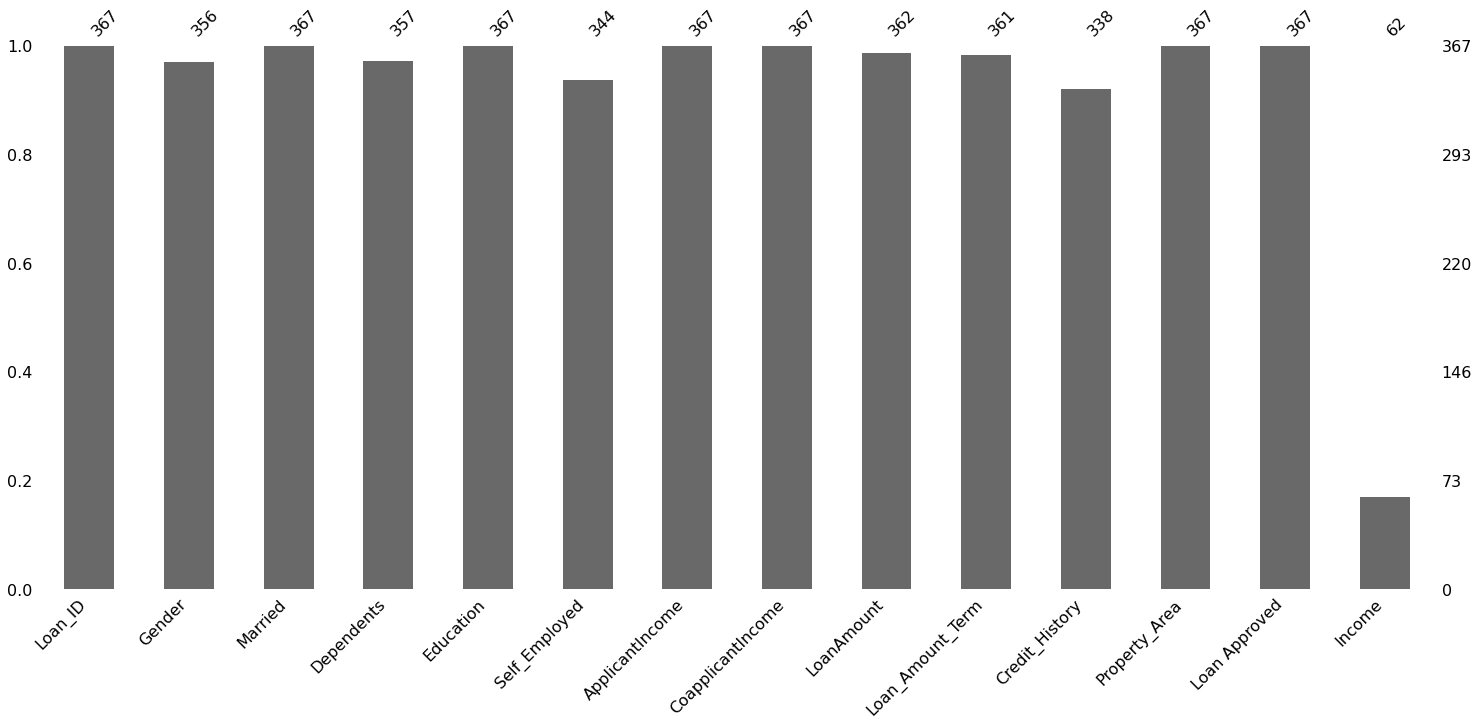

In [34]:
msno.bar(df) #bar plot

In [35]:
# dropping the unnecessary ones again

df = df.drop(['Income', 'Loan_ID'], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
 11  Loan Approved      367 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 34.5+ KB


## Missing Values Treatment

In [37]:
df = df.dropna()
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,0


<AxesSubplot:>

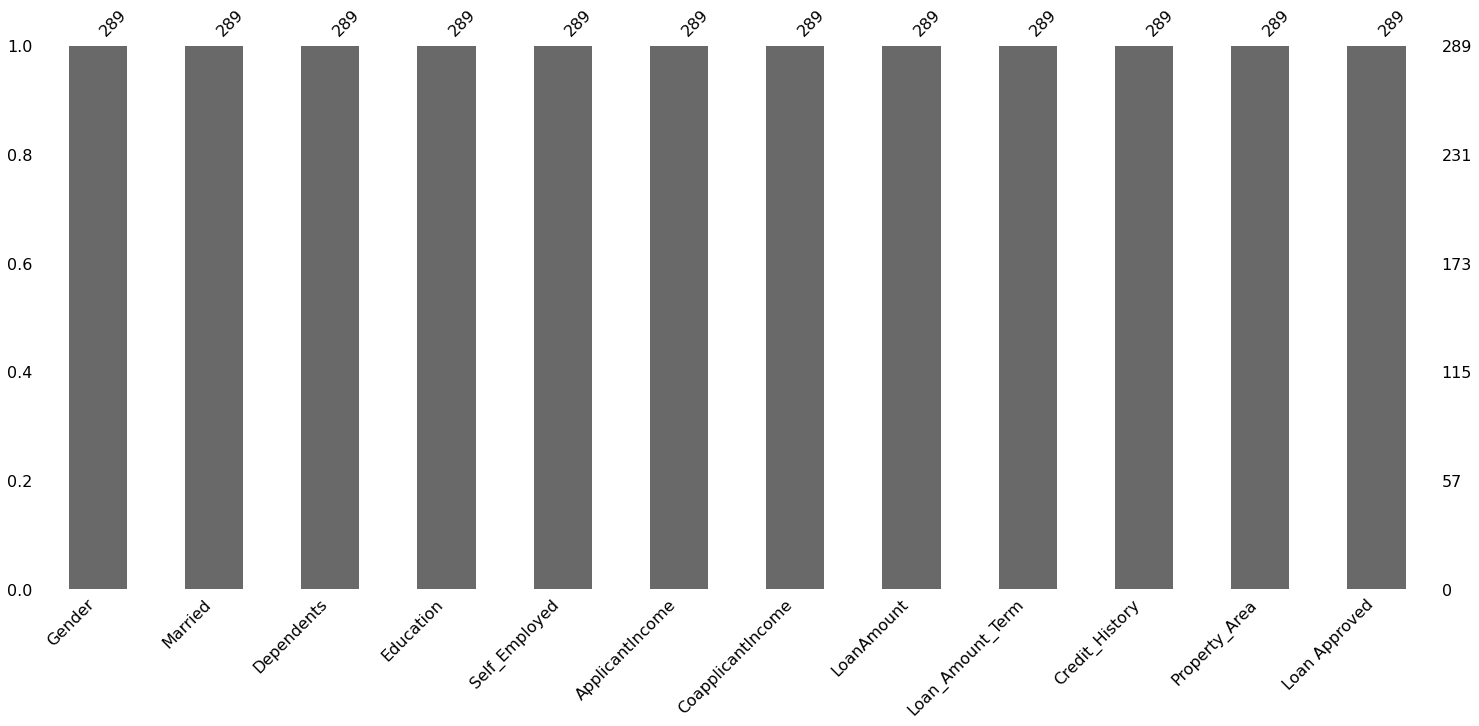

In [38]:
msno.bar(df) #bar plot

**Label Enconding : Cateforical Data**

Categorical features refer to string-type data and can be easily understood by human beings. But in the case of machines, they cannot interpret the categorical data directly. Therefore, the categorical data must be translated into numerical data that can be understood by machines.

Machine learning models cannot interpret the categorical data. Hence, needs the translation to numerical format. There are many ways to convert categorical data into numerical data. Here will be using the method of label encoding.

In [39]:
#Checking the unique values of each columns in the dataset

print (df['Gender'].unique()) 
print (df['Married'].unique()) 
print (df['Education'].unique()) 
print (df['Self_Employed'].unique()) 
print (df['Property_Area'].unique()) 

['Male' 'Female']
['Yes' 'No']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Semiurban' 'Rural']


In [40]:
print (df['Dependents'].unique()) 

['0' '1' '2' '3+']


In [41]:
df['Dependents'].value_counts()

0     167
2      50
1      42
3+     30
Name: Dependents, dtype: int64

In [42]:
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married']) 
df['Dependents']= label_encoder.fit_transform(df['Dependents']) 
df['Education']= label_encoder.fit_transform(df['Education']) 
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed']) 
df['Property_Area']= label_encoder.fit_transform(df['Property_Area'])
df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
153,1,1,1,1,0,2463,2360,117.0,360.0,0.0,2,0
196,1,1,1,0,0,4796,0,114.0,360.0,0.0,1,0
249,1,0,0,0,0,2925,0,40.0,180.0,1.0,0,0
61,1,1,0,0,1,7016,292,125.0,360.0,1.0,2,0
94,1,1,1,0,0,4609,2333,123.0,360.0,0.0,1,0
140,1,0,0,0,0,4727,0,150.0,360.0,0.0,0,0
53,1,1,2,0,0,4116,1000,30.0,180.0,1.0,2,0
345,1,1,3,0,0,8334,0,260.0,360.0,1.0,2,0
10,1,0,0,1,0,3091,0,90.0,360.0,1.0,2,0
234,0,1,0,0,0,2157,1788,104.0,360.0,1.0,2,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             289 non-null    int32  
 1   Married            289 non-null    int32  
 2   Dependents         289 non-null    int32  
 3   Education          289 non-null    int32  
 4   Self_Employed      289 non-null    int32  
 5   ApplicantIncome    289 non-null    int64  
 6   CoapplicantIncome  289 non-null    int64  
 7   LoanAmount         289 non-null    float64
 8   Loan_Amount_Term   289 non-null    float64
 9   Credit_History     289 non-null    float64
 10  Property_Area      289 non-null    int32  
 11  Loan Approved      289 non-null    int64  
dtypes: float64(3), int32(6), int64(3)
memory usage: 22.6 KB


In [44]:
df.columns.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan Approved']

In [45]:
## Total Income 
#as there is dependancy between the columns ApplicantIncome and CoapplicantIncome, to overcome the multicolinearity, 
#adding the two columns as Total Income


In [46]:
df['TotalIncome']= df['ApplicantIncome'] + df['CoapplicantIncome'] 
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved,TotalIncome
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,0,5720
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,0,4576
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,0,6800
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,0,3276
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2,0,5587
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,1,1,0,0,2269,2167,99.0,360.0,1.0,1,0,4436
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2,0,5786
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2,0,4867
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0,0,7393


In [47]:
# dropping the unnecessary ones again

df = df.drop(['ApplicantIncome','CoapplicantIncome'], axis=1)
df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved,TotalIncome
55,1,0,0,0,0,130.0,360.0,0.0,2,0,2750
196,1,1,1,0,0,114.0,360.0,0.0,1,0,4796
233,0,0,1,0,0,92.0,360.0,1.0,1,0,7600
63,0,0,0,0,0,108.0,360.0,0.0,0,1,3601
137,1,1,1,0,0,120.0,360.0,1.0,0,0,4939
88,1,0,2,1,0,77.0,360.0,1.0,1,0,5250
172,1,1,0,0,0,143.0,360.0,1.0,0,0,5225
169,0,1,1,0,0,79.0,360.0,1.0,0,0,3564
337,1,1,0,0,0,119.0,360.0,1.0,2,0,3850
221,1,1,0,1,0,149.0,360.0,1.0,0,1,5668


In [48]:
correlation after preprocessing

SyntaxError: invalid syntax (Temp/ipykernel_12004/2785131416.py, line 1)

<AxesSubplot:>

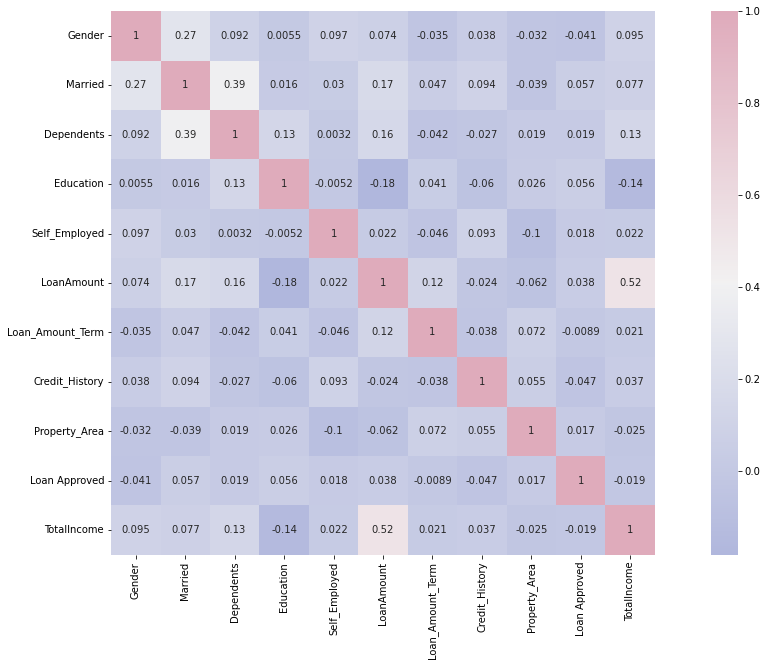

In [49]:
corrmat = df.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(20,10))
sns.heatmap(corrmat,cmap= cmap, annot=True, square=True)


## Feature Selection

### Target Variable : Y
- Loan Approced
- Through this model I want to predict the eligibility of Loan Approval and the Loan Amount. There would a predictive model on 
  -  **Loan Approval Prediction Model(Classification)** : depending on the other features if anyone is eligible to get the approval of loans

### Independent Variables(X0, X1, ....................................., Xn)
-  'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'TotalIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']
   

In [50]:
X = df[['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'TotalIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']]
y = df['Loan Approved']

## Data Splitting 

In [51]:
from sklearn.model_selection import train_test_split     
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

In [52]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  

In [53]:
X_test

array([[ 0.52558833,  0.72092776,  1.11912363, -0.54566731, -0.34050261,
         0.10927379, -1.5267299 ,  0.24866737, -2.25365201, -1.27777594],
       [ 0.52558833,  0.72092776, -0.78174077, -0.54566731, -0.34050261,
        -0.30680922, -0.51934515,  0.24866737,  0.44372423, -0.07301577],
       [ 0.52558833,  0.72092776,  2.06955583, -0.54566731, -0.34050261,
        -0.31941218, -0.46537811,  0.24866737,  0.44372423, -0.07301577],
       [ 0.52558833, -1.38710152, -0.78174077, -0.54566731, -0.34050261,
         0.57576864,  1.18961112,  0.24866737,  0.44372423, -0.07301577],
       [ 0.52558833,  0.72092776, -0.78174077, -0.54566731, -0.34050261,
        -0.32163623, -0.15956488,  0.24866737,  0.44372423,  1.1317444 ],
       [ 0.52558833,  0.72092776, -0.78174077, -0.54566731,  2.93683503,
        -0.59259986,  0.05630328, -0.66504678,  0.44372423, -1.27777594],
       [ 0.52558833, -1.38710152, -0.78174077, -0.54566731, -0.34050261,
        -0.36945334, -0.91510344, -3.95441771

In [54]:
nameOfClassifiers=[]
Accuracy=[]

# Logistic Regression Classifier

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
lr.score(X_test, y_test)

print("The accuracy of Logistic Regression Classifier Model is {:.2f}".format(lr.score(X_test, y_test)))
nameOfClassifiers.append("Logistic Regression Classifier")
Accuracy.append(lr.score(X_test, y_test))

The accuracy of Logistic Regression Classifier Model is 0.90


# RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, random_state=0).fit(X_train, y_train)
rf.score(X_test, y_test)

print("The accuracy of Random Classifier Model is {:.2f}".format(rf.score(X_test, y_test)))
nameOfClassifiers.append("Random Classifier Model")
Accuracy.append(rf.score(X_test, y_test))

The accuracy of Random Classifier Model is 0.90


# MLPClassifier

In [60]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=20, max_iter=100000, hidden_layer_sizes=16, activation='tanh').fit(X_train, y_train)
mlp.score(X_test, y_test)

print("The accuracy of MLP Classifier Model is {:.2f}".format(mlp.score(X_test, y_test)))
nameOfClassifiers.append("MLP Classifier Model")
Accuracy.append(mlp.score(X_test, y_test))

The accuracy of MLP Classifier Model is 0.90


# DecisionTreeClassifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier(criterion='entropy',max_depth=25)
DTC.fit(X_test,y_test)

print("The accuracy of DecisionTree Classifier Model is {:.2f}".format(DTC.score(X_test, y_test)))
nameOfClassifiers.append("DecisionTree Classifier Model")
Accuracy.append(DTC.score(X_test, y_test))

The accuracy of DecisionTree Classifier Model is 1.00


**Hence, for this classification problem I have used several classification algorithm. Among them, Logistic regression,  Randomforest classifier, MLP classifier has shown exactly the same accuracy, that is 90% where model loss is very low(10%). However, DecisionTree Classifier has best performed in this regard with 100% Accuracy.**

In [62]:
# Saving model 

import pickle 
pickle.dump(DTC, open('DTCmodel.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('DTCmodel.pkl','rb'))


# Deployment on Flask

In [63]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle

app = Flask(__name__)
model = pickle.load(open('DTCmodel.pkl', 'rb'))